In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

#If your computer is going low on RAM, commment the line above and use this instead:
#from minisdk.core import EcephysProjectCache

c:\Users\Alberto\anaconda3\envs\NeuroScience\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
data_dir = "./allendata"
#Again, we might want to use another folder if we do want to overwrite potential data we have
#data_dir = "./converted"

#From here on everything works with both AllenSDK and the MiniSDK!
manifest_path = os.path.join(data_dir, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [5]:
sessions = cache.get_session_table() #Returns a Pandas dataframe
sessions.head() #Sneak peek of the table

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


In [6]:
#Grab our (filtered) data from our favorite session. We take a female mice with nice unit count
session_id = 798911424 
oursession = cache.get_session_data(session_id, timeout=3000)

c:\Users\Alberto\anaconda3\envs\NeuroScience\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\Alberto\anaconda3\envs\NeuroScience\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [7]:
oursession.units

c:\Users\Alberto\anaconda3\envs\NeuroScience\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\Alberto\anaconda3\envs\NeuroScience\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\Alberto\anaconda3\envs\NeuroScience\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\Alberto\anaconda3\envs\NeuroScience\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' versio

,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
951088679,0.620607,82.147455,0.023654,1,480.97,2.575648,7.429131,0.053350,51.364291,0.028062,...,215.0,APN,8328.0,3018.0,7095.0,probeA,See electrode locations,29999.965974,1249.998582,True
951088664,0.587044,78.399165,0.001739,0,427.07,3.085334,6.843864,0.033732,40.358293,0.051513,...,215.0,APN,8328.0,3018.0,7095.0,probeA,See electrode locations,29999.965974,1249.998582,True
951088734,0.560996,187.504005,0.001249,5,311.01,5.152564,1.418476,0.356931,56.950961,0.001292,...,215.0,APN,8316.0,2988.0,7099.0,probeA,See electrode locations,29999.965974,1249.998582,True
951088721,0.474457,196.741545,0.000059,4,355.17,4.295014,11.517381,0.000271,58.358552,0.020218,...,215.0,APN,8316.0,2988.0,7099.0,probeA,See electrode locations,29999.965974,1249.998582,True
951088862,0.534674,92.125020,0.089901,16,239.50,4.043348,19.953126,0.013619,79.934237,0.011335,...,215.0,APN,8304.0,2958.0,7103.0,probeA,See electrode locations,29999.965974,1249.998582,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951117435,0.565021,100.299225,0.004762,377,135.28,5.824413,0.198506,0.000000,49.584501,0.002925,...,417.0,VISrl,7281.0,1194.0,8910.0,probeF,See electrode locations,30000.038460,1250.001602,True
951117571,0.219237,142.853685,0.001151,394,51.09,5.542278,0.241426,0.000000,65.892097,0.000296,...,417.0,VISrl,7267.0,1136.0,8953.0,probeF,See electrode locations,30000.038460,1250.001602,True
951117127,0.367834,45.597435,0.068652,335,171.02,3.295105,10.886100,0.037876,118.906935,0.007595,...,417.0,VISrl,7263.0,1121.0,8963.0,probeF,See electrode locations,30000.038460,1250.001602,True


In [13]:
channels = oursession.channels
channels.head()

,filtering,probe_channel_number,probe_horizontal_position,probe_id,probe_vertical_position,structure_acronym,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate
id,,,,,,,,,,,
849854220,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,4,43,800036198,60,LP,218.0,LP,7647.0,3029.0,7470.0
849854224,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,6,59,800036198,80,LP,218.0,LP,7650.0,3011.0,7469.0
849854226,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,7,27,800036198,80,LP,218.0,LP,7651.0,3002.0,7469.0
849854230,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,9,11,800036198,100,LP,218.0,LP,7654.0,2985.0,7468.0
849854234,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,11,27,800036198,120,LP,218.0,LP,7657.0,2967.0,7466.0


In [9]:
oursession.units.columns

Index(['waveform_PT_ratio', 'waveform_amplitude', 'amplitude_cutoff',
       'cluster_id', 'cumulative_drift', 'd_prime', 'firing_rate',
       'isi_violations', 'isolation_distance', 'L_ratio', 'local_index',
       'max_drift', 'nn_hit_rate', 'nn_miss_rate', 'peak_channel_id',
       'presence_ratio', 'waveform_recovery_slope',
       'waveform_repolarization_slope', 'silhouette_score', 'snr',
       'waveform_spread', 'waveform_velocity_above', 'waveform_velocity_below',
       'waveform_duration', 'filtering', 'probe_channel_number',
       'probe_horizontal_position', 'probe_id', 'probe_vertical_position',
       'structure_acronym', 'ecephys_structure_id',
       'ecephys_structure_acronym', 'anterior_posterior_ccf_coordinate',
       'dorsal_ventral_ccf_coordinate', 'left_right_ccf_coordinate',
       'probe_description', 'location', 'probe_sampling_rate',
       'probe_lfp_sampling_rate', 'probe_has_lfp_data'],
      dtype='object')

In [17]:
probes= oursession.probes
probes.head()

,description,location,sampling_rate,lfp_sampling_rate,has_lfp_data
id,,,,,
800036196,probeA,See electrode locations,29999.965974,1249.998582,True
800036198,probeB,See electrode locations,29999.917201,1249.996550,True
800036200,probeC,See electrode locations,29999.996048,1249.999835,True
800036202,probeD,See electrode locations,29999.919900,1249.996662,True
800036204,probeE,See electrode locations,29999.999422,1249.999976,True


# example from the documentation of how the time series for the pupil data can be plotted. I am not sure if the dataset is the one we should be using

In [10]:
from pathlib import Path
output_dir = '.'
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import pprint

# This class uses a 'manifest' to keep track of downloaded data and metadata.  
# All downloaded files will be stored relative to the directory holding the manifest
# file.  If 'manifest_file' is a relative path (as it is below), it will be 
# saved relative to your working directory.  It can also be an absolute path.
boc =  BrainObservatoryCache(
    manifest_file=str(Path(output_dir) / 'brain_observatory_manifest.json'))


No eye tracking for experiment 501940850.


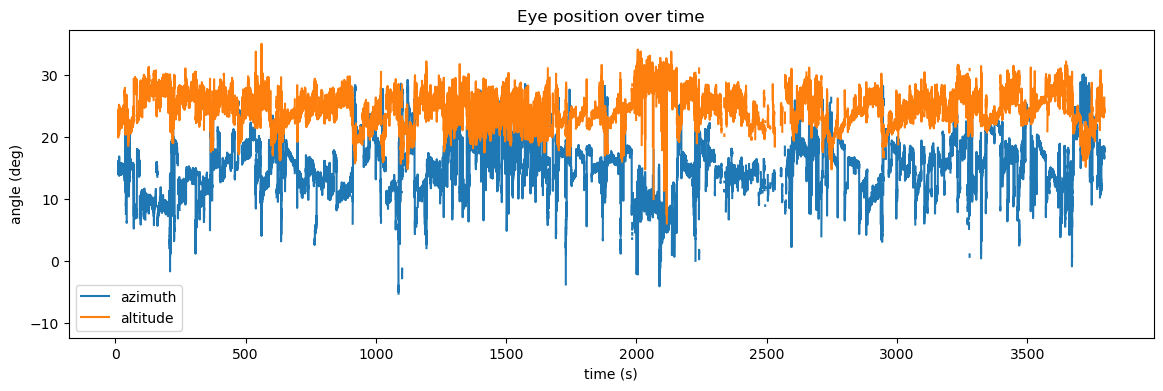

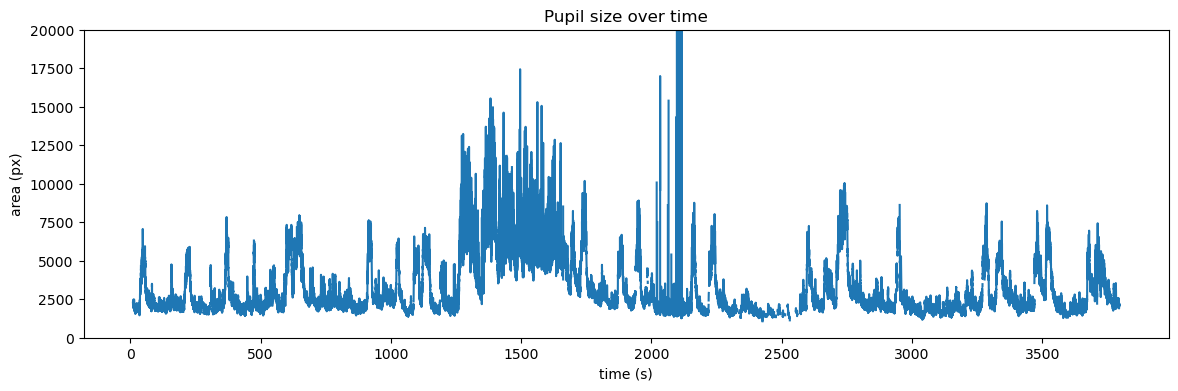

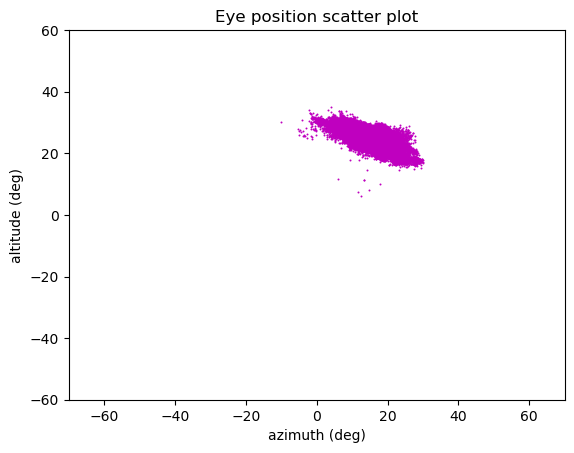

In [22]:
from allensdk.brain_observatory.brain_observatory_exceptions import NoEyeTrackingException
from matplotlib import pyplot as plt
%matplotlib inline

# example with no eye tracking data
data_set = boc.get_ophys_experiment_data(501940850)
try:
    timestamps, locations = data_set.get_pupil_location()
except NoEyeTrackingException:
    print("No eye tracking for experiment %s." % data_set.get_metadata()["ophys_experiment_id"])

data_set = boc.get_ophys_experiment_data(569407590)
    
# looking at azimuth and altitude over time
# by default locations returned are (azimuth, altitude)
# passing as_spherical=False to get_pupil_location will return (x,y) in cm
timestamps, locations = data_set.get_pupil_location()
plt.figure(figsize=(14,4))
plt.plot(timestamps, locations.T[0])
plt.plot(timestamps, locations.T[1])
plt.title("Eye position over time")
plt.xlabel("time (s)")
plt.ylabel("angle (deg)")
plt.legend(['azimuth', 'altitude'])
plt.show()

#pupil size over time
timestamps, area = data_set.get_pupil_size()
plt.figure(figsize=(14,4))
plt.plot(timestamps, area)
plt.title("Pupil size over time")
plt.xlabel("time (s)")
plt.ylabel("area (px)")
plt.ylim(0, 20000)
plt.show()

# scatter of gaze positions over approximate screen area
plt.figure()
plt.scatter(locations.T[0], locations.T[1], s=2, c="m", edgecolor=['none'])
plt.title("Eye position scatter plot")
plt.xlim(-70, 70)
plt.ylim(-60, 60)
plt.xlabel("azimuth (deg)")
plt.ylabel("altitude (deg)")
plt.show()

In [25]:
from allensdk.brain_observatory.brain_observatory_exceptions import NoEyeTrackingException
from matplotlib import pyplot as plt
%matplotlib inline

# example with no eye tracking data
data_set = boc.get_ophys_experiment_data(501940850)
try:
    timestamps, locations = data_set.get_pupil_location()
except NoEyeTrackingException:
    print("No eye tracking for experiment %s." % data_set.get_metadata()["ophys_experiment_id"])

data_set = boc.get_ophys_experiment_data(569407590)
data_set.get_pupil_location()
    

No eye tracking for experiment 501940850.


(array([   9.90214,    9.93532,    9.96849, ..., 3795.65885, 3795.69202,
        3795.7252 ]),
 array([[14.374119, 24.108868],
        [14.253625, 24.161215],
        [14.367289, 24.056772],
        ...,
        [16.92834 , 25.190815],
        [16.455294, 24.799452],
        [16.608145, 26.29771 ]], dtype=float32))

# Now I will use the dataset Neuropixels 


In [29]:
session_id = 798911424 
oursession = cache.get_session_data(session_id, timeout=3000)
pupil_data=oursession.get_pupil_data()
pupil_data.head()

c:\Users\Alberto\anaconda3\envs\NeuroScience\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\Alberto\anaconda3\envs\NeuroScience\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


,corneal_reflection_center_x,corneal_reflection_center_y,corneal_reflection_height,corneal_reflection_width,corneal_reflection_phi,pupil_center_x,pupil_center_y,pupil_height,pupil_width,pupil_phi,eye_center_x,eye_center_y,eye_height,eye_width,eye_phi
Time (s),,,,,,,,,,,,,,,
3.19164,317.160964,209.068474,13.067665,13.755189,-0.464981,333.190707,157.055606,77.541279,87.412999,0.505086,301.381949,181.998711,229.612709,308.641034,0.087119
3.21108,317.365600,209.020044,13.383498,13.953636,-0.532640,333.133583,157.269074,78.277465,87.175631,0.525272,301.441187,182.127234,229.350283,309.169835,0.089137
3.22597,317.366557,208.912068,13.838725,13.398494,0.768277,333.310095,157.237919,78.057688,87.336002,0.553507,301.364634,182.147409,229.489186,309.129978,0.084539
3.25926,317.646290,208.875409,13.371761,14.088678,-0.579179,333.362343,157.383227,78.189870,87.223518,0.509529,301.612530,182.218010,229.686056,308.415070,0.080030
3.29261,317.681899,209.023736,13.123954,13.877458,-0.679791,333.790117,157.513388,77.216313,86.775410,0.539041,301.771155,182.076282,229.282999,307.723724,0.086991


In [44]:
oursession.metadata

c:\Users\Alberto\anaconda3\envs\NeuroScience\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\Alberto\anaconda3\envs\NeuroScience\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\Alberto\anaconda3\envs\NeuroScience\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\Alberto\anaconda3\envs\NeuroScience\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' versio

{'specimen_name': 'Vip-IRES-Cre;Ai32-421338',
 'session_type': 'brain_observatory_1.1',
 'full_genotype': 'Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt',
 'sex': 'F',
 'age_in_days': 110.0,
 'rig_equipment_name': 'NP.1',
 'num_units': 825,
 'num_channels': 2233,
 'num_probes': 6,
 'num_stimulus_presentations': 70931,
 'session_start_time': datetime.datetime(2018, 12, 21, 0, 2, 57, tzinfo=tzoffset(None, -28800)),
 'ecephys_session_id': 798911424,
 'structure_acronyms': ['LP',
  'DG',
  'CA1',
  'VISam',
  nan,
  'APN',
  'TH',
  'Eth',
  'CA3',
  'VISrl',
  'HPF',
  'ProS',
  'SUB',
  'VISp',
  'CA2',
  'VISl',
  'MB',
  'NOT',
  'LGv',
  'VISal'],
 'stimulus_names': ['spontaneous',
  'gabors',
  'flashes',
  'drifting_gratings',
  'natural_movie_three',
  'natural_movie_one',
  'static_gratings',
  'natural_scenes',
  'drifting_gratings_contrast']}

In [39]:
pupil_data.columns
pupil_data.index


Float64Index([    3.19164,     3.21108,     3.22597,     3.25926,     3.29261,
                  3.32617,     3.35929,     3.39261,     3.42657,     3.45925,
              ...
              10442.09948, 10442.13748, 10442.16602, 10442.19938, 10442.23276,
              10442.26596, 10442.29949, 10442.33272, 10442.36604, 10442.40061],
             dtype='float64', name='Time (s)', length=312999)

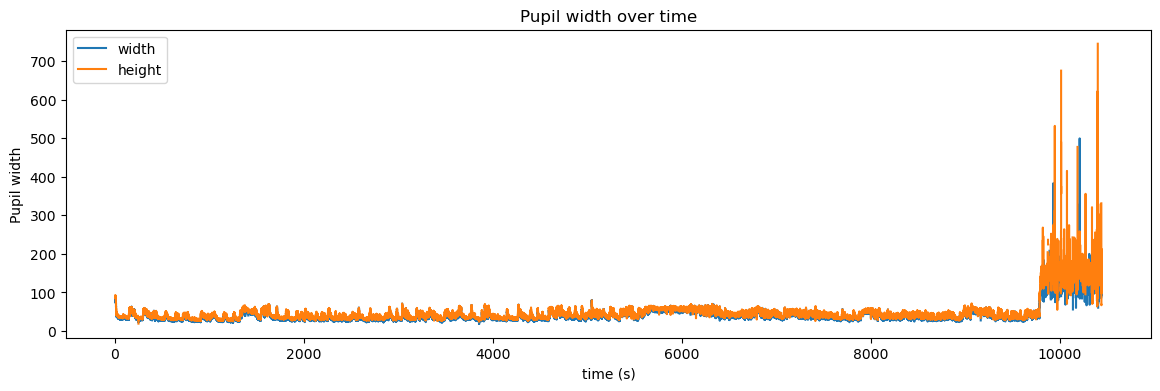

In [ ]:
timestamps= pupil_data.index
pupil_width=pupil_data['pupil_width']
pupil_height = pupil_data['pupil_height']
plt.figure(figsize=(14,4))
plt.plot(timestamps, pupil_height)
plt.plot(timestamps, pupil_width)
plt.title("Pupil width over time")
plt.xlabel("time (s)")
plt.ylabel("Pupil width")
plt.legend(['width', 'height'])
plt.show()




## Focus on the drifting gratings



We have to align the stimulus and the neuron spikes / pupil data 

https://allensdk.readthedocs.io/en/latest/_static/examples/nb/ecephys_quickstart.html

In [47]:
presentations = oursession.get_stimulus_table("drifting_gratings")
presentations.head()


,stimulus_block,start_time,stop_time,contrast,temporal_frequency,spatial_frequency,stimulus_name,orientation,phase,size,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,
3798,2.0,1586.180717,1588.182387,0.8,15.0,0.04,drifting_gratings,0.0,"[5308.98333333, 5308.98333333]","[250.0, 250.0]",2.00167,246
3799,2.0,1589.183244,1591.184924,0.8,2.0,0.04,drifting_gratings,180.0,"[5308.98333333, 5308.98333333]","[250.0, 250.0]",2.00168,247
3800,2.0,1592.185737,1594.187427,0.8,1.0,0.04,drifting_gratings,45.0,"[5308.98333333, 5308.98333333]","[250.0, 250.0]",2.00169,248
3801,2.0,1595.188274,1597.189944,0.8,8.0,0.04,drifting_gratings,90.0,"[5308.98333333, 5308.98333333]","[250.0, 250.0]",2.00167,249
3802,2.0,1598.190777,1600.192447,0.8,2.0,0.04,drifting_gratings,270.0,"[5308.98333333, 5308.98333333]","[250.0, 250.0]",2.00167,250


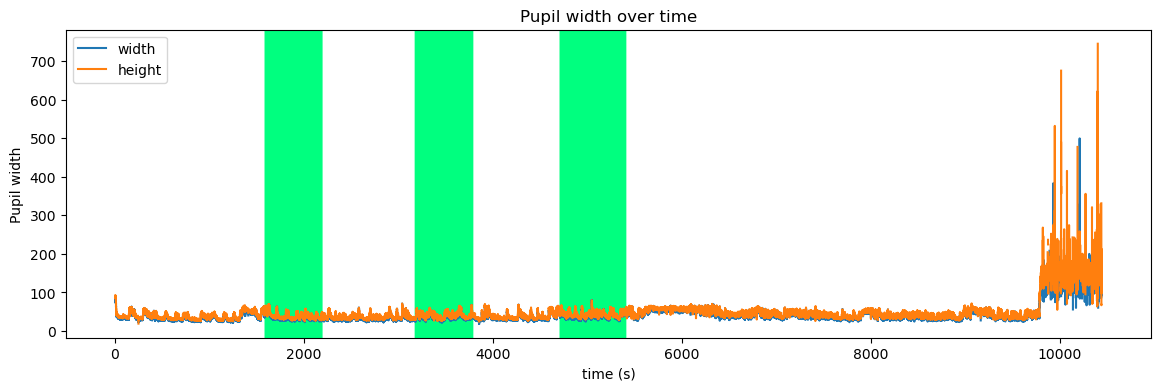

In [53]:
#select only the rows with time where the drift gratings are shown

pupil_data_drift=pupil_data#[(pupil_data.index > 1586) & (pupil_data.index < 1601)]
timestamps= pupil_data_drift.index
pupil_width=pupil_data_drift['pupil_width']
pupil_height = pupil_data_drift['pupil_height']
plt.figure(figsize=(14,4))
plt.plot(timestamps, pupil_height)
plt.plot(timestamps, pupil_width)
plt.title("Pupil width over time")
#Obtain the intervals at which the drifting grating happened 
n_grates = presentations.shape[0]
grate_start = presentations["start_time"].values[:n_grates]
grate_end = presentations["stop_time"].values[:n_grates]



#Let's mark where the stimulus happend with a colored area
for t0, tf in zip(grate_start, grate_end):
    plt.axvspan(t0, tf, color="springgreen")

plt.xlabel("Time (ms)")
plt.ylabel("# Spikes")
#plt.show()
plt.xlabel("time (s)")
plt.ylabel("Pupil width")
plt.legend(['width', 'height'])
#plt.show()
